## Part 1 -- A股市场的牛熊周期

股票的价格数据是标准的时间序列数据，即按照时间排序的数据。

时间序列数据具有三个要素：
    1. 趋势：是指数据随着时间的变化而变化的统一倾向，向上的倾向或者向下的倾向。
    2. 季节性：是指在某一固定的时间区间，数据重复出现某一模式，如每年第三季度的销量数据会达到峰值。季节性不局限于四季，或者年度，而在于模式出现的时间间隔相同，可预测
    3. 周期性：是指数据高低起伏的周期性，峰值与低谷构成一个周期。周期性不要求周期出现的时间间隔相同。

股票市场的牛熊市周期，是股票市场周期性的体现。

取来上1995年到2018年，上证指数的数据。以上证指数为代表，观察A股市场的牛熊周期转换。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#读取本地数据
a_share = pd.read_csv('/Users/chocolatekuma/Downloads/sh.csv')
a_share.head()


,indexID,exchangeCD,tradeDate,preCloseIndex,openIndex,lowestIndex,highestIndex,closeIndex,turnoverVol,turnoverValue,CHG,CHGPct
0,000001.ZICN,XSHG,1/23/95,571.24,564.86,553.11,565.04,553.44,37217700,198999645.0,-17.80,-0.031160
1,000001.ZICN,XSHG,1/24/95,553.44,552.78,547.38,559.34,547.57,39115000,248520984.0,-5.87,-0.010606
2,000001.ZICN,XSHG,1/25/95,547.57,550.27,550.27,558.58,555.77,37848000,241254095.0,8.20,0.014975
3,000001.ZICN,XSHG,1/26/95,555.77,553.91,551.14,555.26,553.11,32339100,182835350.0,-2.66,-0.004786
4,000001.ZICN,XSHG,1/27/95,553.11,552.95,552.93,564.61,562.59,55862700,229763769.0,9.48,0.017139


Text(0.5,1,'Fig 1: 120-day moving average of SSE Composite Index')

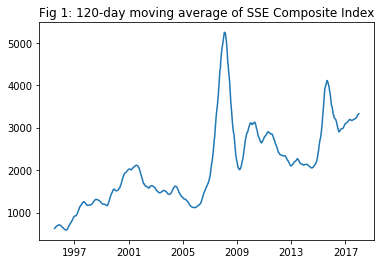

In [2]:
a_share.index = a_share['tradeDate']
a_share.index = pd.to_datetime(a_share.index)

#平滑数据：取半年的移动平均
a_share['ma120'] = a_share['closeIndex'].rolling(window = 120).mean()

#图示移动平均走势
plt.plot(a_share['ma120'])
plt.title('Fig 1: 120-day moving average of SSE Composite Index')

如图所示，从1995年以来，有四个牛熊周期。

牛熊周期的大概时间区间为：

1. 1996年 约至 2005年
2. 2005年 约至 2009年
3. 2009年 约至 2013年
4. 2013年 约至 2018年

In [3]:
# 获取牛市顶点和熊市低谷的具体数值和日期
trough1_date = a_share[a_share.index<'2006-01-01']['closeIndex'].idxmin()
trough1 = a_share.loc[a_share.index == trough1_date]['closeIndex'].values[0]

peak1_date = a_share[(a_share.index<'2006-01-01')&(a_share.index>'1996-01-01')]['closeIndex'].idxmax()
peak1 = a_share[a_share.index == peak1_date]['closeIndex'].values[0]

trough2_date = a_share[(a_share.index>'2005-01-01')&(a_share.index<'2007-01-01')]['closeIndex'].idxmin()
trough2 = a_share[a_share.index== trough2_date]['closeIndex'].values[0]

peak2_date = a_share[(a_share.index>'2007-01-01')&(a_share.index<'2008-01-01')]['closeIndex'].idxmax()
peak2 = a_share[a_share.index == peak2_date]['closeIndex'].values[0]

trough3_date = a_share[(a_share.index>'2008-01-01')&(a_share.index<'2009-01-01')]['closeIndex'].idxmin()
trough3 = a_share[a_share.index == trough3_date]['closeIndex'].values[0]

peak3_date = a_share[(a_share.index>'2009-01-01')&(a_share.index<'2013-01-01')]['closeIndex'].idxmax()
peak3 = a_share[a_share.index==peak3_date]['closeIndex'].values[0]

trough4_date = a_share[(a_share.index>'2013-01-01')&(a_share.index<'2014-01-01')]['closeIndex'].idxmin()
trough4 = a_share[a_share.index==trough4_date]['closeIndex'].values[0]

peak4_date = a_share[(a_share.index>'2013-01-01')&(a_share.index<'2017-01-01')]['closeIndex'].idxmax()
peak4 = a_share[a_share.index==peak4_date]['closeIndex'].values[0]

# 计算牛熊市的收益率
ret = []
for i in range(len(a_share)):
    if a_share.iloc[i].name<=trough1_date:
        ret.append(10000)
    elif a_share.iloc[i].name<=peak1_date:
        ret.append((a_share.iloc[i]['closeIndex']-trough1)/trough1)
    elif a_share.iloc[i].name<=trough2_date:
        ret.append((a_share.iloc[i]['closeIndex']-peak1)/peak1)
    elif a_share.iloc[i].name<=peak2_date:
        ret.append((a_share.iloc[i]['closeIndex']-trough2)/trough2)
    elif a_share.iloc[i].name<=trough3_date:
        ret.append((a_share.iloc[i]['closeIndex']-peak2)/peak2)
    elif a_share.iloc[i].name<=peak3_date:
        ret.append((a_share.iloc[i]['closeIndex']-trough3)/trough3)
    elif a_share.iloc[i].name<=trough4_date:
        ret.append((a_share.iloc[i]['closeIndex']-peak3)/peak3)
    elif a_share.iloc[i].name<=peak4_date:
        ret.append((a_share.iloc[i]['closeIndex']-trough4)/trough4)
    else:
        ret.append((a_share.iloc[i]['closeIndex']-peak4)/peak4)
a_share['return'] = ret
a_share = a_share[a_share['return']!= 10000]
a_share.to_csv('/Users/chocolatekuma/Desktop/whatever.csv')

为了更加直观的观察牛熊周期，利用面积图显示牛熊周期信息。（由线上制图平台plotly制作：https://plot.ly/~misskuma/113/ ）。

如图所示：（1995年以来的牛熊周期）
1. 牛1：1996-01-23 ~ 2001-06-13，顶点2242.42点，涨幅334.19%； 熊1：2001-06-14 ~ 2005-07-11，底点1011.50点，跌幅-54.89%  
2. 牛2：2005-07-12 ~ 2007-10-16，顶点6092.06点，涨幅502.28%； 熊2：2007-10-17 ~ 2008-11-04，底点1706.70点，跌幅-72%   
3. 牛3：2008-11-05 ~ 2009-08-04，顶点3471.44点，涨幅103.4%； 熊4：2009-08-05 ~ 2013-06-27，底点1950.01点，跌幅-43.83%  
4. 牛4：2013-06-28 ~ 2015-06-12，顶点5166.35点，涨幅164%； 熊4：2015-06-13 ~ 至今

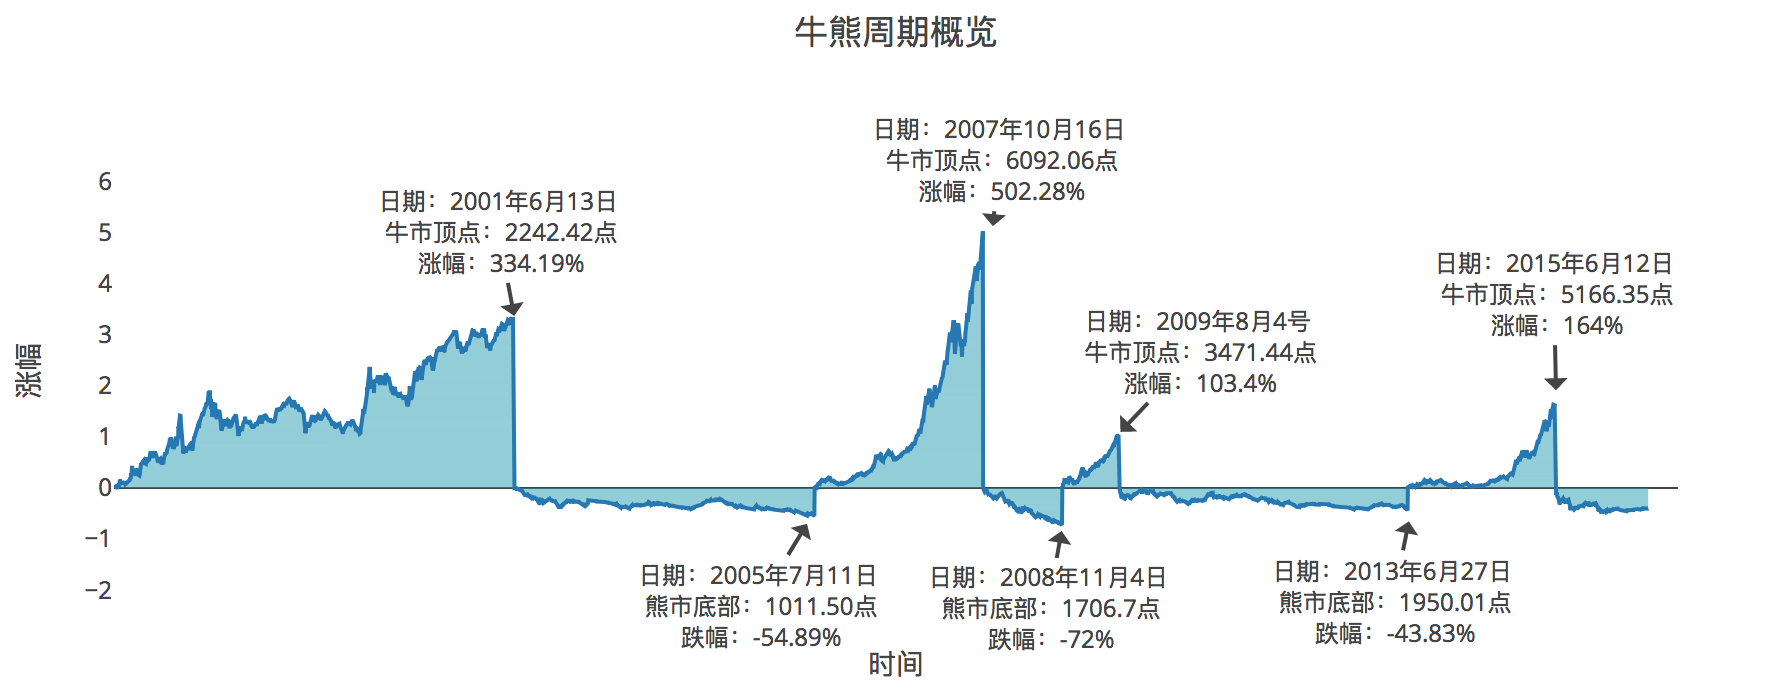

In [4]:
from IPython.display import Image
Image(filename = '/Users/chocolatekuma/Desktop/bull&bear.png')